In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

In [25]:
x, y = make_classification(
    n_samples=100,       # Fixed number of samples
    n_features=2,        # Fixed number of features
    n_classes=3,         # Number of classes
    n_informative=2,     # All features are informative
    n_redundant=0,       # No redundant features
    n_clusters_per_class=1,  # Adjusted to satisfy the condition
    flip_y=0.03,         # Add slight label noise
    class_sep=1.5,       # Enhance separability
    random_state=42
)

In [26]:
df = pd.DataFrame(x,columns=['feature1','feature2'])
df['target'] = y

In [27]:
df.head()

,feature1,feature2,target
0,-1.426315,-1.449498,2
1,-1.176214,1.912767,0
2,-1.810385,1.056563,0
3,-1.000234,-1.251066,2
4,-1.135331,-1.306694,0


In [28]:
df_train = df.iloc[:60,:].sample(20)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [29]:
x_test = df_val.drop(columns=['target'])
y_test = df_val['target']

Evaluate

In [30]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

Bagging

1st

In [31]:
df_bag = df_train.sample(12,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
54,2.271190,2.360777,1
44,2.307731,2.339463,1
44,2.307731,2.339463,1
31,-1.532714,-1.520408,2
26,-1.987396,0.960109,0
44,2.307731,2.339463,1
52,0.631405,0.583858,1
52,0.631405,0.583858,1
16,-0.632541,-1.064005,2
29,-1.560967,1.269169,0


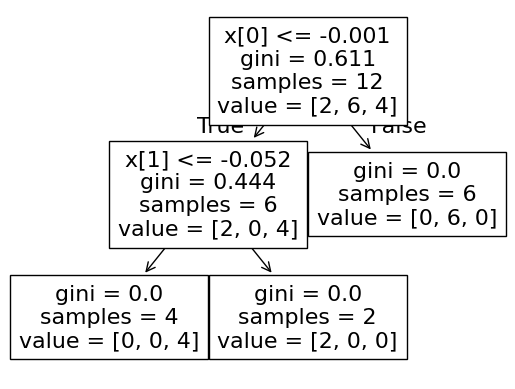

1.0


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


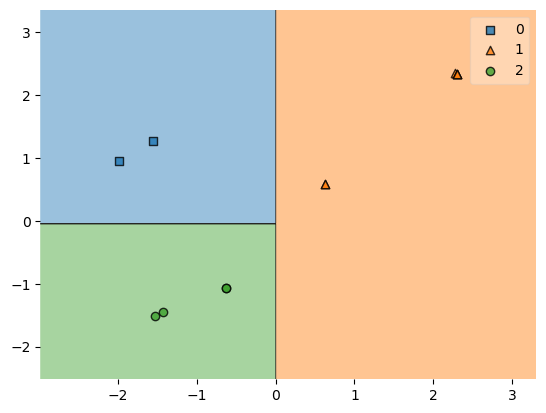

In [32]:
dt1 = DecisionTreeClassifier()
evaluate(dt1,x,y)

2nd

In [33]:
df_bag = df_train.sample(12,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
0,-1.426315,-1.449498,2
4,-1.135331,-1.306694,0
23,-1.672789,1.133562,0
8,0.698967,0.624372,1
15,0.315464,0.274494,1
0,-1.426315,-1.449498,2
26,-1.987396,0.960109,0
13,-1.093403,1.822721,0
5,1.874869,1.899419,1
36,-2.021659,1.033585,0


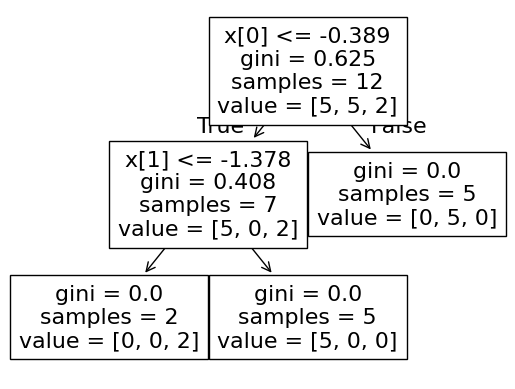

c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


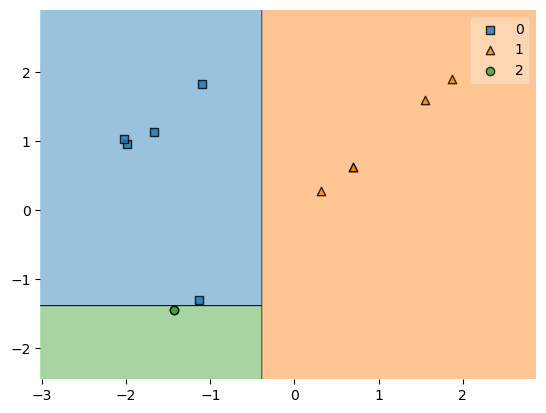

In [34]:
dt2 = DecisionTreeClassifier()
evaluate(dt2,x,y)